In [1]:
import numpy as np
from mkutils import create_fig, save_to_file
import copy
import matplotlib as plt

In [125]:
lhs_profile = np.loadtxt('eval_lhs/bsResult.xvg', comments=['@', '#'])
lhs_histo = np.loadtxt('eval_lhs/histo.xvg', comments=['@', '#'])

lhs_histo[:,0] *= -1
lhs_histo = np.flip(lhs_histo, axis=0)
lhs_profile[:,0] *= -1
lhs_profile = np.flip(lhs_profile, axis=0)

rhs_profile = np.loadtxt('eval_rhs/bsResult.xvg', comments=['@', '#'])
rhs_histo = np.loadtxt('eval_rhs/histo.xvg', comments=['@', '#'])

frames = np.loadtxt('frames.dat', skiprows=4, usecols=[0,1])
complete = np.loadtxt('complete.txt')
#frames = np.concatenate((frames, frames_hf))

frames = [item for item in frames if item[0] in complete]
histo = np.concatenate((lhs_histo, rhs_histo), axis=0)
profile= np.concatenate((lhs_profile, rhs_profile), axis=0)

In [126]:
print(histo[:,0])

[-5.98525 -5.95575 -5.92625 -5.89675 -5.86725 -5.83775 -5.80825 -5.77875
 -5.74925 -5.71975 -5.69025 -5.66075 -5.63125 -5.60175 -5.57225 -5.54275
 -5.51325 -5.48375 -5.45425 -5.42475 -5.39525 -5.36575 -5.33625 -5.30675
 -5.27725 -5.24775 -5.21825 -5.18875 -5.15925 -5.12975 -5.10025 -5.07075
 -5.04125 -5.01175 -4.98225 -4.95275 -4.92325 -4.89375 -4.86425 -4.83475
 -4.80525 -4.77575 -4.74625 -4.71675 -4.68725 -4.65775 -4.62825 -4.59875
 -4.56925 -4.53975 -4.51025 -4.48075 -4.45125 -4.42175 -4.39225 -4.36275
 -4.33325 -4.30375 -4.27425 -4.24475 -4.21525 -4.18575 -4.15625 -4.12675
 -4.09725 -4.06775 -4.03825 -4.00875 -3.97925 -3.94975 -3.92025 -3.89075
 -3.86125 -3.83175 -3.80225 -3.77275 -3.74325 -3.71375 -3.68425 -3.65475
 -3.62525 -3.59575 -3.56625 -3.53675 -3.50725 -3.47775 -3.44825 -3.41875
 -3.38925 -3.35975 -3.33025 -3.30075 -3.27125 -3.24175 -3.21225 -3.18275
 -3.15325 -3.12375 -3.09425 -3.06475 -3.03525 -3.00575 -2.97625 -2.94675
 -2.91725 -2.88775 -2.85825 -2.82875 -2.79925 -2.76

C0 : frame 126, distance: 6.593
C1 : frame 143, distance: 6.496
C2 : frame 146, distance: 6.398
C3 : frame 172, distance: 6.303
C4 : frame 173, distance: 6.205
C5 : frame 200, distance: 6.106
C6 : frame 236, distance: 6.023
C7 : frame 240, distance: 5.934
C8 : frame 249, distance: 5.846
C9 : frame 288, distance: 5.751
C0 : frame 292, distance: 5.673
C1 : frame 297, distance: 5.595
C2 : frame 338, distance: 5.496
C3 : frame 359, distance: 5.420
C4 : frame 379, distance: 5.325
C5 : frame 389, distance: 5.237
C6 : frame 414, distance: 5.138
C7 : frame 433, distance: 5.061
C8 : frame 442, distance: 4.965
C9 : frame 449, distance: 4.866
C0 : frame 470, distance: 4.773
C1 : frame 479, distance: 4.674
C2 : frame 509, distance: 4.576
C3 : frame 530, distance: 4.478
C4 : frame 549, distance: 4.383
C5 : frame 587, distance: 4.290
C6 : frame 589, distance: 4.202
C7 : frame 609, distance: 4.110
C8 : frame 619, distance: 4.014
C9 : frame 644, distance: 3.920
C0 : frame 655, distance: 3.822
C1 : fra

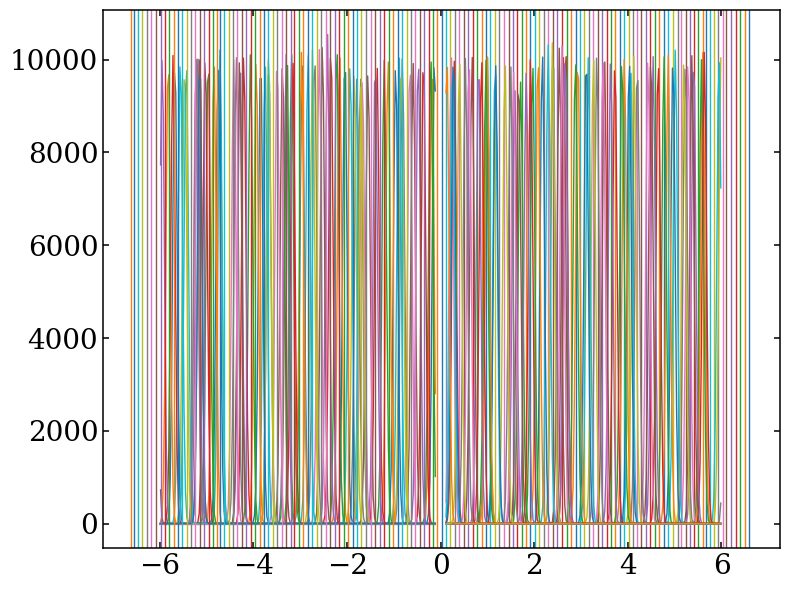

In [127]:
fig, axes = create_fig(1, 1)
ax = axes[0]

for i, (frame, distance) in enumerate(frames):        
    ci = int(i - (np.floor(i/10) * 10))
    if distance < 0:
        ax.plot(histo[200:, 0], histo[200:, i+1-72], color='C{:d}'.format(ci))
    else:
        ax.plot(histo[:200, 0], histo[:200, i+1], color='C{:d}'.format(ci))
    ax.axvline(x=distance, color='C{:d}'.format(ci))
    print('C{:d} : frame {:d}, distance: {:.3f}'.format(ci, int(frame), distance))
print('\n')



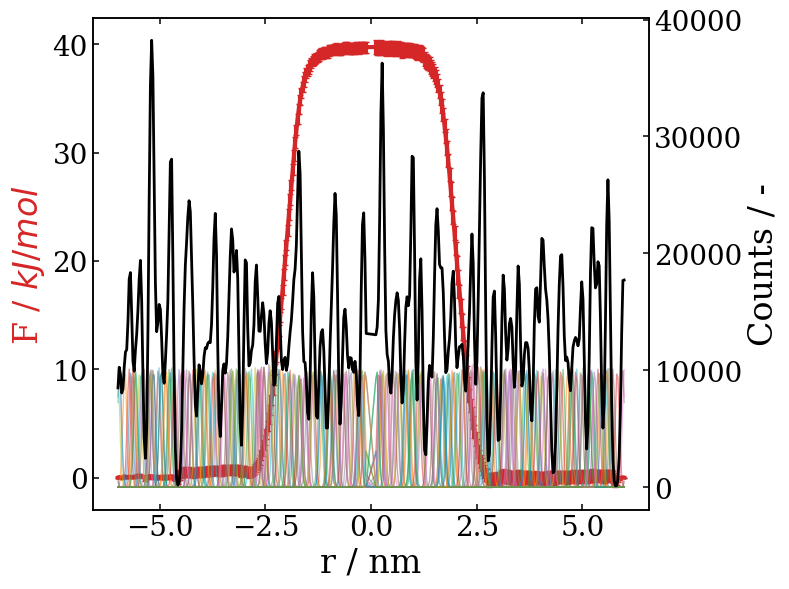

In [129]:
histofig, ax = create_fig(1,1)
ax = ax[0]

ax2 = ax.twinx()
#ax.errorbar(cor_prof[:,0], cor_prof[:,1]-np.amin(cor_prof[:,1]), profile[:,2], capsize=2, color='C3', lw=3)
cum_hist = np.zeros((400, 72))
#cum_hist[:200, 0] = lhs_histo[:, 0]
#cum_hist[200:, 0] = rhs_histo[:, 0]
cum_hist[:,0] = histo[:, 0]
for i in range(1,144):
    if i>71:
        ax2.plot(-histo[:,0], histo[:,i-72], alpha=0.5)
        cum_hist[200:, 1] += histo[200:, i-72]
    else:
        ax2.plot(histo[:,0], histo[:,i], alpha=0.5)
        cum_hist[:200, 1] += histo[:200, i]
    
ax2.plot(cum_hist[:, 0], cum_hist[:,1], color='k', lw=2)
ax.errorbar(profile[:,0], profile[:,1], profile[:,2], capsize=2, color='C3', lw=3)

ax.set_xlabel('r / nm')
ax.set_ylabel('F / $kJ/mol$', color='C3')
ax2.set_ylabel('Counts / -')
save_to_file('PMF_COUNT')

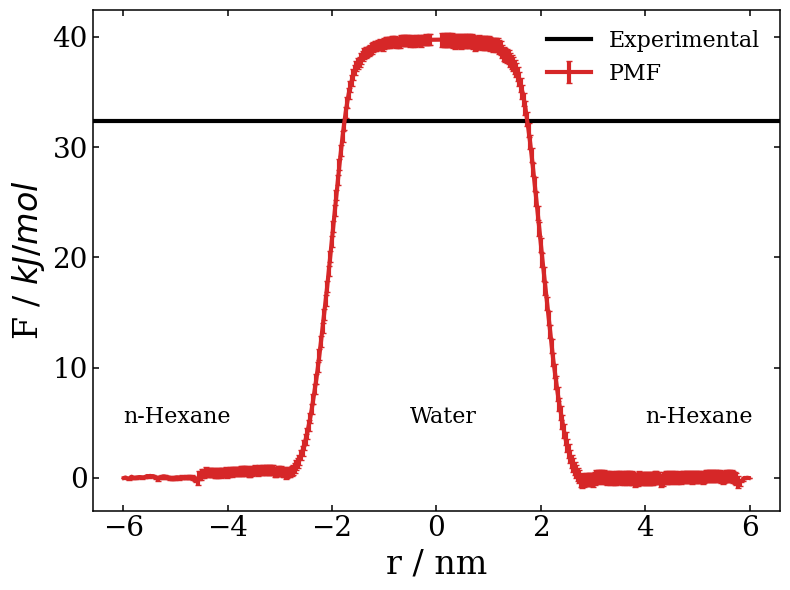

In [121]:
histofig, ax = create_fig(1,1)
ax = ax[0]

cor_prof = copy.deepcopy(profile)
ax.errorbar(profile[:,0], profile[:,1], profile[:,2], capsize=2, color='C3', lw=3, label='PMF')
#ax.errorbar(cor_prof[:,0], cor_prof[:,1]-np.amin(cor_prof[:,1]), profile[:,2], capsize=2, color='C3', lw=3)
ax.axhline(32.4, *ax.get_xlim(), lw=3, color='k', label='Experimental')
fontdict={'fontsize':16}
ax.text(4, 5, 'n-Hexane', fontdict=fontdict)
ax.text(-0.5, 5, 'Water', fontdict=fontdict)
ax.text(-6, 5, 'n-Hexane', fontdict=fontdict)

ax.set_xlabel('r / nm')
ax.set_ylabel('F / $kJ/mol$')
ax.legend()
save_to_file('F')